# <b>(Introduction to AI), Spring 2021</b>
# <u><b>Assignment</b></u>
## <u><b>Classification mushroom using Decision tree classifier</b></u>


### Email address: gursimransingh@sjsu.edu


##  <u>References and sources </u>

https://pbpython.com/categorical-encoding.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

https://scikit-learn.org/stable/modules/tree.html


##  <u>Solution</u>

#### Code the solution


In [14]:
import pandas as pd
import numpy as np

### importing the data

In [19]:
data=pd.read_csv(r'C:\Users\gursi\Desktop\CS 156\CS 156\Assignment\Assignment5\homework5_input_data.csv')
data.head()



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [18]:
data.shape

(8124, 23)

#### ONE Hot Encoding

In [20]:
# here converting data set into 1,0 using one hot encoding
new_data=pd.get_dummies(data,columns=data.columns[1:],prefix= data.columns[1:])

print(new_data.head())
new_data.dtypes
new_data.shape
#new_data['cap-shape_b']


  class  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0     p            0            0            0            0            0   
1     e            0            0            0            0            0   
2     e            1            0            0            0            0   
3     p            0            0            0            0            0   
4     e            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  ...  \
0            1              0              0              1  ...   
1            1              0              0              1  ...   
2            0              0              0              1  ...   
3            1              0              0              0  ...   
4            1              0              0              1  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0             1             0             0          0

(8124, 118)

In [21]:
data.dtypes #to check the data type we have in our data

# select_dtypes function which we can use to build a new dataframe containing only the object columns.
# we usee this function to create a new dataframe having same type of data
#new_data =old_data.select_dtypes(include =[datatype]).copy()

data["bruises"].value_counts() # this function counts the recurring of an type of element in pandas column

# after this i can make a dicitotnary and assign values and use replace function of pandas dataframe


f    4748
t    3376
Name: bruises, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


In [23]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(new_data.drop('class',axis=1),new_data['class'],test_size=0.2 , random_state=0)
Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape

((6499, 117), (1625, 117), (6499,), (1625,))

In [24]:
clf=DecisionTreeClassifier(random_state=0)
d1=cross_val_score(clf,Xtrain,Ytrain,cv=10)
print(d1)
print("The average of k fold cross validation " ,d1.mean())


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
The average of k fold cross validation  1.0


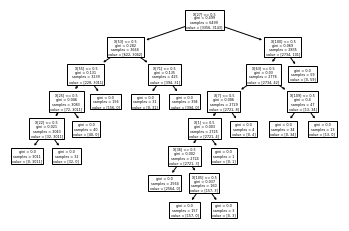

In [25]:
from sklearn import tree
from sklearn.metrics import accuracy_score
clf.fit(Xtrain,Ytrain)

tree.plot_tree(clf)
pred_values=clf.predict(Xtest)
pred_values_1=clf.predict(Xtrain)


In [26]:
print("the accuracy on the test set is" ,accuracy_score(Ytest, pred_values))
print("the accuracy on train set is " ,accuracy_score(Ytrain, pred_values_1))
print(pred_values)
print(Ytest.to_numpy())

the accuracy on the test set is 1.0
the accuracy on train set is  1.0
['p' 'e' 'e' ... 'p' 'e' 'e']
['p' 'e' 'e' ... 'p' 'e' 'e']


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
confusion_matrix(Ytest, pred_values)


array([[852,   0],
       [  0, 773]], dtype=int64)

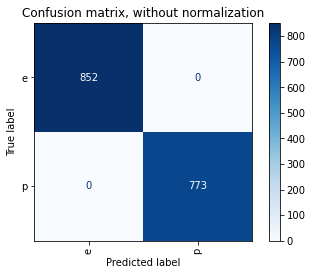

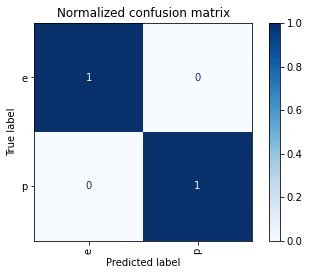

In [29]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, Xtest, Ytest, cmap=plt.cm.Blues, normalize=normalize, xticks_rotation='vertical')
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)

plt.show()